In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Calibrate Giessen Data

In [2]:
# Import data
pat_id = 'pat_4'
output = pd.read_csv(f"../Data/Giessen/Night/{pat_id}_resampled.csv")
output

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.824339,2.890218,2.958401,3.014484,3.051555,3.072676,3.084245,3.093753,3.106332,3.123122,...,-5.531320,-0.715009,-4.540111,0.600573,0.410065,-0.787575,-0.294332,0.127155,-0.161324,0.086208
1,2.468537,2.541695,2.623106,2.697837,2.758768,2.806704,2.844543,2.875211,2.900010,2.917309,...,-6.621064,0.408444,-4.073112,1.561743,-0.472258,-0.173932,-0.323620,0.220517,-0.527396,-0.019008
2,1.956207,2.045598,2.142903,2.236184,2.331610,2.443358,2.581238,2.743866,2.919773,3.092839,...,0.267168,-3.283988,2.252173,-0.317338,0.058215,-1.892459,0.131948,-0.416572,0.116368,0.117581
3,3.400872,3.442584,3.506324,3.580516,3.653055,3.713308,3.753498,3.771302,3.767630,3.745967,...,-1.588285,-2.862969,-2.863900,-0.515466,1.595705,0.372057,0.847610,-0.207487,-0.114391,0.133214
4,2.795139,2.842213,2.884807,2.914862,2.931744,2.942021,2.953185,2.971741,2.999411,3.034222,...,-5.829633,-0.646013,-4.724306,0.915784,0.809399,-1.200153,-0.301901,0.256347,-0.122675,0.096300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,2.948140,2.975897,3.006111,3.032431,3.051094,3.060332,3.058967,3.044789,3.012987,2.954829,...,1.098696,-5.635040,0.878500,1.068934,0.962332,1.976272,1.285328,1.748491,0.049217,-0.235084
3884,2.678721,2.741287,2.791922,2.818794,2.819677,2.799730,2.767632,2.731453,2.698700,2.675143,...,-4.789452,-0.919854,-1.229998,0.570865,0.035829,-0.035858,-0.001651,-0.266849,0.692812,0.250340
3885,2.635322,2.707906,2.770907,2.806028,2.806701,2.780006,2.738960,2.696742,2.663819,2.644958,...,-4.940340,-1.905568,-1.719312,-0.002245,-0.261728,-0.130873,-0.112594,-0.116499,0.743709,0.315592
3886,2.265161,2.315320,2.361723,2.392788,2.403106,2.396105,2.378025,2.356691,2.339475,2.331079,...,-7.049740,-1.878627,-2.334354,0.083497,-2.631279,1.162542,-0.529182,-0.121969,0.175947,0.106774


In [3]:
# Import Emulator
emulators = pd.read_pickle(f'../Emulators/linear_models_and_r2_scores_500.csv')
emulators

,R2_Score,MSE,RSE,Model
0,0.893000,0.033581,0.184362,LinearRegression()
1,0.892594,0.020753,0.144933,LinearRegression()
2,0.894500,0.012332,0.111723,LinearRegression()
3,0.898439,0.007143,0.085030,LinearRegression()
4,0.902824,0.004173,0.064987,LinearRegression()
...,...,...,...,...
PC6,0.484459,0.030169,0.174744,LinearRegression()
PC7,0.720384,0.007104,0.084794,LinearRegression()
PC8,0.053464,0.007135,0.084981,LinearRegression()
PC9,0.015008,0.002188,0.047059,LinearRegression()


In [12]:
#output_keys = output.iloc[:,101:].columns
output_keys = ['t_max_dpdt', 'a_epad', 'epad', 's_a_epad', 's_epad', 'min_dpdt', 'max_dpdt',
                         'A_p', 'P_max', 'esp', 'sys', 'EF',  'Ees/Ea', 'iT', 'PC1', 'PC2', 'PC3']


In [11]:
selected_rows = emulators.loc[output_keys].copy()
selected_rows

,R2_Score,MSE,RSE,Model
t_max_dpdt,0.998386,1.483013e-05,3.874306e-03,LinearRegression()
a_epad,0.959158,3.067360e-01,5.571908e-01,LinearRegression()
epad,0.905400,1.393654e+00,1.187679e+00,LinearRegression()
s_a_epad,0.922397,1.176706e-01,3.451084e-01,LinearRegression()
s_epad,0.909596,6.844501e-01,8.323240e-01,LinearRegression()
min_dpdt,0.932531,1.285802e+03,3.607519e+01,LinearRegression()
max_dpdt,0.947770,1.815636e+03,4.286827e+01,LinearRegression()
A_p,0.951190,4.655557e-01,6.864476e-01,LinearRegression()
P_max,0.960754,2.839761e+00,1.695362e+00,LinearRegression()
esp,0.976472,6.147999e-01,7.888391e-01,LinearRegression()


In [6]:
filtered_output = output[output_keys]
filtered_output

,t_max_dpdt,a_epad,epad,s_a_epad,s_epad,min_dpdt,max_dpdt,A_p,P_max,esp,sys,EF,Ees/Ea,iT,PC1,PC2,PC3
0,0.440,28.191473,19.712347,23.672212,15.263275,-363.498343,324.849209,23.951910,60.494437,46.219781,52.668575,0.235966,0.308843,0.000,-5.531320,-0.715009,-4.540111
1,0.440,27.465274,18.351250,22.937938,13.983280,-366.601252,319.920482,22.908262,60.558837,45.074965,53.796053,0.255683,0.343514,0.940,-6.621064,0.408444,-4.073112
2,0.428,32.390509,20.867366,27.598009,16.749012,-386.491277,312.997928,26.628938,65.438522,50.680320,59.742973,0.225528,0.291202,0.944,0.267168,-3.283988,2.252173
3,0.384,28.960241,18.875857,24.362067,14.363817,-368.778216,330.780606,23.918049,61.042976,47.950089,53.179167,0.214486,0.273052,0.984,-1.588285,-2.862969,-2.863900
4,0.440,28.144342,18.890920,23.697010,14.480199,-359.107053,322.598941,23.517631,59.710287,46.032192,52.326318,0.229074,0.297142,0.888,-5.829633,-0.646013,-4.724306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,0.336,28.922640,20.101524,23.948221,15.233083,-400.969091,357.868320,24.512082,64.801324,48.997532,56.127948,0.243881,0.322543,0.936,1.098696,-5.635040,0.878500
3884,0.416,29.979735,20.223736,24.949023,15.406708,-399.782482,352.319446,25.101736,64.965034,47.350325,56.080512,0.271141,0.372008,0.836,-4.789452,-0.919854,-1.229998
3885,0.420,28.261174,19.825187,23.354352,15.096246,-396.065424,347.249035,24.043180,63.916084,49.169662,55.563042,0.230715,0.299909,0.916,-4.940340,-1.905568,-1.719312
3886,0.432,27.271059,19.649824,22.566902,15.150053,-381.965279,331.671587,23.460441,62.618596,47.874164,55.717172,0.235464,0.307983,0.924,-7.049740,-1.878627,-2.334354


### With observation and model error

In [23]:
## Define priors
# mean
c_svn_mu = 20.5
r_pat_mu = 0.31
c_pat_mu = 3.8
rv_mu = 1.15

# variances
c_svn_sd = 3.42**2
r_pat_sd = 0.05**2
c_pat_sd = 0.63**2
rv_sd = 0.48**2

# Model error
epsilon_model = np.diag(selected_rows['RSE']**2)

# Observation error 
obs_error_scale = 0.05
obs_error = np.std(filtered_output)*obs_error_scale
epsilon_obs = np.diag(obs_error)

# total error
full_error = epsilon_obs + epsilon_model

# Build beta matrix (d * p, where d is dimension of y_obs and p is dinemnsion of X)
beta_matrix = []
intercept = []

for index, row_entry in selected_rows.iterrows():
    model = row_entry['Model']
    coeffs = model.coef_
    b0 = model.intercept_

    beta_matrix.append(coeffs)
    intercept.append(b0)

# Convert the list to a NumPy array
beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept)
intercept = intercept.reshape(len(intercept), 1)


posterior_means = []

for row in range(len(filtered_output)):
 
 # dynamically define prior on T
 t_mu = filtered_output['iT'][row]
 t_sd = 0.00001**2
 mu_0 = np.array([c_svn_mu, r_pat_mu, c_pat_mu, rv_mu, t_mu])[:, np.newaxis]
 Sd = [c_svn_sd, r_pat_sd, c_pat_sd, rv_sd, t_sd]
 Sigma_0 = np.diag(Sd)


 # Select observation and reshape to be (d, 1)
 Y_obs = np.array(filtered_output.T[row])
 Y_obs = Y_obs.reshape(len(Y_obs), 1)
 
  
 #  Scale observation by intercepts of models
 Y_scaled = Y_obs - intercept
 

 # Compute the posterior covariance
 Sigma_post_inv = (beta_matrix.T @ np.linalg.inv(full_error) @ beta_matrix) + np.linalg.inv(Sigma_0)
 Sigma_post = np.linalg.inv(Sigma_post_inv)
 
 # Compute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)


 # Cmpute the posterior mean
 Mu_post = Sigma_post @ (beta_matrix.T @ np.linalg.inv(full_error) @ Y_scaled + np.linalg.inv(Sigma_0) @ mu_0)

 
 posterior_means.append(Mu_post.squeeze()) 


posterior_means = np.array(posterior_means)

/opt/anaconda3/envs/AnalysisGiessen/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [29]:
posterior_means_trimmed

array([], shape=(0, 5), dtype=float64)

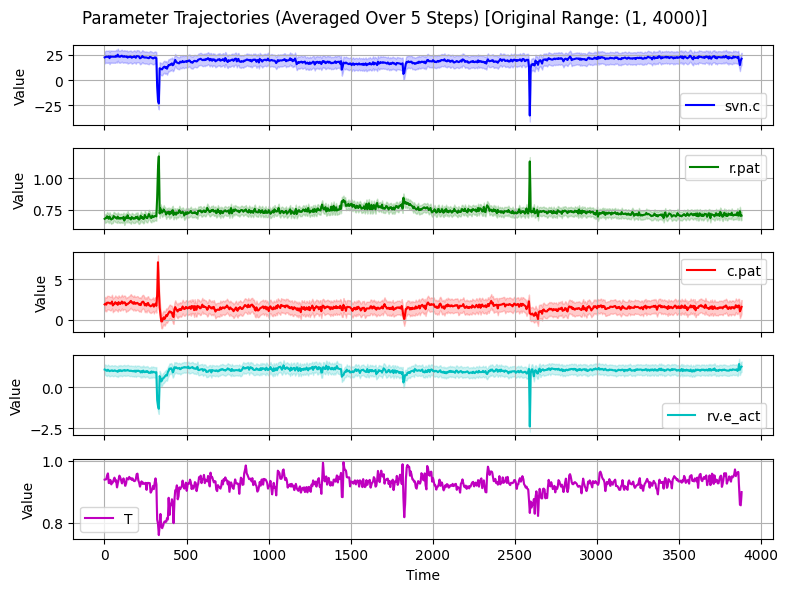

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class ResolutionController:
    def __init__(self, window_size):
        self.window_size = window_size

    def downsample(self, data):
        """Downsamples the data by averaging over non-overlapping windows."""
        if data.shape[0] < self.window_size:
            raise ValueError(f"Data has fewer than {self.window_size} time steps!")

        num_windows = data.shape[0] // self.window_size  # Compute number of full windows
        return data[:num_windows * self.window_size].reshape(num_windows, self.window_size, -1).mean(axis=1)

# Initialize resolution controller
window_size = 5
res_controller = ResolutionController(window_size)

# Define time range before downsampling
time_range = (1, 4000)  # Specify the indices from the original data

# Ensure posterior_variances has shape (3888, 5)
posterior_variances_corrected = np.array(Sigma_post).diagonal().reshape(1, -1)  # (1, 5)
posterior_variances_corrected = np.tile(posterior_variances_corrected, (posterior_means.shape[0], 1))  # (3888, 5)

# Slice the original data before downsampling
posterior_means_trimmed = posterior_means[time_range[0]:time_range[1]]
posterior_variances_trimmed = posterior_variances_corrected[time_range[0]:time_range[1]]

# Downsample the sliced data
posterior_means_smooth = res_controller.downsample(posterior_means_trimmed)  # (new_length, 5)
posterior_variances_smooth = res_controller.downsample(np.sqrt(posterior_variances_trimmed))  # (new_length, 5)

# Generate new time indices based on downsampling
T_smooth = np.arange(posterior_means_smooth.shape[0]) * window_size + time_range[0]

# Colors for different parameters
colors = ['b', 'g', 'r', 'c', 'm']
param_names = ['svn.c', 'r.pat', 'c.pat', 'rv.e_act', 'T']

# Plot each parameter on a separate subplot
fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True)

for i in range(5):
    mean = posterior_means_smooth[:, i]  # Smoothed mean
    std_dev = posterior_variances_smooth[:, i]  # Smoothed standard deviation

    axes[i].plot(T_smooth, mean, color=colors[i], label=param_names[i])
    axes[i].fill_between(T_smooth, mean - 2 * std_dev, mean + 2 * std_dev, color=colors[i], alpha=0.2)
    
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid()

axes[-1].set_xlabel('Time')
fig.suptitle(f'Parameter Trajectories (Averaged Over {window_size} Steps) [Original Range: {time_range}]')
plt.tight_layout()
plt.show()

In [ ]:
pat4 = pd.read_csv("../Data/Giessen/Night/pat_4.csv")